<a href="https://colab.research.google.com/github/ClaudioH19/TareasML/blob/master/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

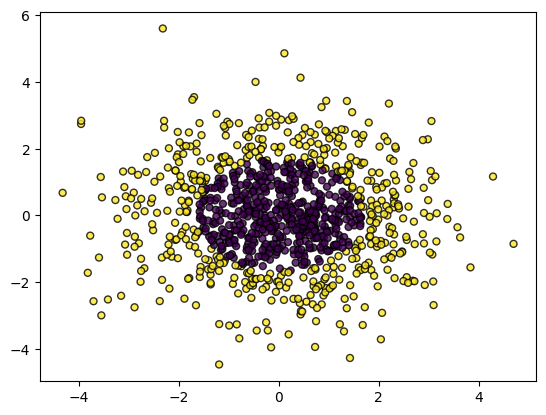

X1 shape:  (1000, 2)
Y1 shape:  (1000,)


In [32]:
#create two gaussian distributions using make_gaussian_quantiles

from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

#generate 2D normally distributed data
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# plot  data. Seaborn, blue a red color, transparency.

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)
plt.show()

#show distribution
print("X1 shape: ", X1.shape)
print("Y1 shape: ", Y1.shape)

# PASO 2: Manipulación de datos


In [35]:
#TRAINING 60, VALIDATION 20, TEST 20

#split data for test and temporal 20 80
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
#split temporal data for train and validation 75% 25%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

#show size of distributions
print("Training set size: ", X_train.shape[0])
print("Validation set size: ", X_val.shape[0])
print("Test set size: ", X_test.shape[0])


Training set size:  600
Validation set size:  200
Test set size:  200


#PASO 3: Exploración de Datos

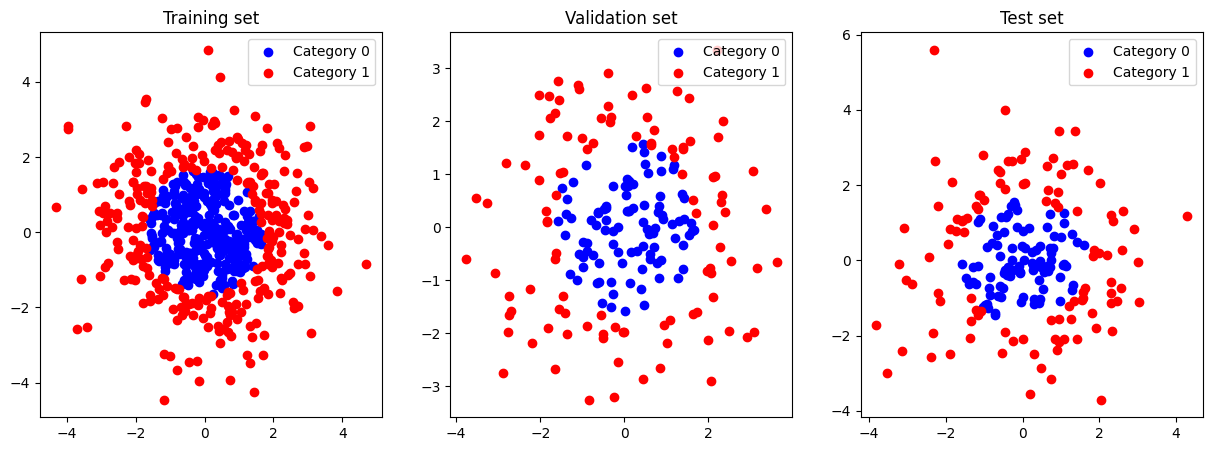

In [36]:
#show data training validation, test for visualization, split for category in red-blue
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Training set')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Category 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Category 1')
plt.legend()

plt.subplot(1, 3, 2)
plt.title('Validation set')
plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], color='blue', label='Category 0')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], color='red', label='Category 1')
plt.legend()

plt.subplot(1, 3, 3)
plt.title('Test set')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label='Category 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label='Category 1')
plt.legend()

plt.show()


# PASO 4: Modelamiento de Datos (Machine Learning)

In [37]:

#C=1 gamma=0.5
#create a svm using gaussian kernel
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

#validate model
y_pred = svm.predict(X_val)

#show classification statistics
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))



              precision    recall  f1-score   support

           0       0.95      0.94      0.94        96
           1       0.94      0.95      0.95       104

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [40]:
#create two arrays for C and gamma values
C_values = [0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 0.5, 1]

#create a dictionary to store the results
results = []

#for each value in C and gamma arrays create a svm model and use validation data
for C in C_values:
    for gamma in gamma_values:
        svm = SVC(kernel='rbf', gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_val)
        report = classification_report(y_val, y_pred, output_dict=True)

        #(macro avg) dataset is balanced
        results.append({
            'C': C,
            'gamma': gamma,
            'precision': report['macro avg']['precision'],
            'recall': report['macro avg']['recall'],
            'f1-score': report['macro avg']['f1-score'],
            'support': report['macro avg']['support']
        })

import pandas as pd
# DataFrame order by f1-score
df = pd.DataFrame(results)
df = df.sort_values(by='f1-score', ascending=False)

#show table
from IPython.display import display
display(df)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,C,gamma,precision,recall,f1-score,support
15,100.0,1.00,0.984848,0.985577,0.984991,200.0
14,100.0,0.50,0.984848,0.985577,0.984991,200.0
10,10.0,0.50,0.979792,0.980369,0.979982,200.0
11,10.0,1.00,0.979792,0.980369,0.979982,200.0
13,100.0,0.10,0.975188,0.974760,0.974949,200.0
12,100.0,0.01,0.970000,0.970753,0.969988,200.0
9,10.0,0.10,0.969788,0.970353,0.969973,200.0
5,1.0,0.10,0.961538,0.961538,0.960000,200.0
3,0.1,1.00,0.951288,0.949119,0.949819,200.0
6,1.0,0.50,0.945113,0.944712,0.944888,200.0


In [41]:
#using c=100 and gamma=1 (best combination) test the model
svm = SVC(kernel='rbf', gamma=1, C=100)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.98      0.97      0.98       106

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



#PASO 5: Interpretación de los Resultados

Como el conjunto de datos estaba balanceado, se decidió dar igual importancia a las clases para evaluar el avg rendimiento, por medio de usar distintos valores para gamma y c.

Mediante los distintos valores y usar el F1-Score como medida representativa del rendimiento por la consideración que hace entre el recall y accuracy, se obtuvo que C=100, y gamma=1 daban los mejores resultados para el modelo.

Al usar un C alto, existe peligro de overfitting, pero el split entre training, validation, y testing data, ayuda a separar las partes de información para usar data nunca antes vista en cada etapa del modelo.

Por ello, podemos decir que el modelo sí se desempeñó bien al usar la data de testing (no vista, y por ello libre de estar sobreajustado), consiguiendo un 0.97 de accuracy usando el kernel gaussiano.



